#### Name: Noha Magdy Ali 
#### ID: 1610126
# Gender Recognition in images  

## The project consists of two main parts 


> Gender recognition using CNNs 


> Another method for gender recognition which is extracting features using image processing then classify the image using fully connected NN 





### Needed packages 

In [0]:
from skimage import data, io
from matplotlib import pyplot as plt
import numpy as np
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from matplotlib.pyplot import imshow, show
from skimage.morphology import watershed
from skimage.measure import label
from skimage.color import label2rgb
from skimage import feature
from skimage.filters import threshold_otsu,  threshold_local, sobel
from skimage.morphology import erosion,dilation,opening,closing,square,disk
from skimage.measure import label
from skimage.color import label2rgb
import os
import pandas as pd
!pip install -U tf-nightly
import tensorflow as tf
import functools
!pip install mitdeeplearning
import mitdeeplearning as mdl
from tqdm import tqdm
import cv2
from skimage.transform import rescale, resize
from skimage.color import rgb2gray
print(tf.__version__)



### Loading and Preparing Data

In [0]:
# file_id = '0BxYys69jI14kSVdWWllDMWhnN2c'
# request = drive_service.files().get_media(fileId=file_id)
# fh = io.BytesIO()
# downloader = MediaIoBaseDownload(fh, request)
# done = False
# while done is False:
#     status, done = downloader.next_chunk()
#     print ("Download %d%%." % int(status.progress() * 100))

# !wget -P /usr https://drive.google.com/drive/u/0/folders/0BxYys69jI14kSVdWWllDMWhnN2c

# my_tar = tarfile.open("/usr/0BxYys69jI14kSVdWWllDMWhnN2c.tar.gz")
# my_tar.extractall('/usr/Dataset') # specify which folder to extract to
# my_tar.close()




In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path= "/content/drive/My Drive/Dataset/" 
data= os.listdir(path)
#print (data)
Data = pd.DataFrame(columns=["Image", "Age", "Gender"])


for idx,i in zip(range(len(data)),data):  
    age, gender, race, name=i.split("_") # getting labels from image 
    img = io.imread(path+i) # loading data set
    img = resize(img, (512, 512)) # unifying the size of the image 
    img = rgb2gray(img) # convert to grayscale 
    img=img_as_ubyte(img)
    img=np.array(img)
    Data.loc[idx] = [ img, age, np.int32(int(gender))] # converting data set as pandas series 
    #append(pd.Series(data={"Image":img, "Age":age, "Gender":gender}, name=idx))

In [0]:
Data.shape

(3251, 3)

In [0]:
Data.head()

,Image,Age,Gender
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61,0
1,"[[153, 174, 196, 206, 207, 205, 206, 206, 206,...",40,0
2,"[[253, 253, 253, 252, 252, 252, 251, 252, 252,...",45,0
3,"[[30, 27, 47, 67, 90, 105, 95, 86, 88, 91, 91,...",41,0
4,"[[177, 177, 177, 178, 178, 178, 179, 179, 181,...",54,0


In [0]:
rand_idxs = np.random.choice(Data.shape[0], 500, True)
test = Data.loc[rand_idxs]
train = Data
train.drop(rand_idxs)

,Image,Age,Gender
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61,0
1,"[[153, 174, 196, 206, 207, 205, 206, 206, 206,...",40,0
2,"[[253, 253, 253, 252, 252, 252, 251, 252, 252,...",45,0
3,"[[30, 27, 47, 67, 90, 105, 95, 86, 88, 91, 91,...",41,0
4,"[[177, 177, 177, 178, 178, 178, 179, 179, 181,...",54,0
...,...,...,...
3246,"[[152, 152, 152, 152, 152, 152, 152, 152, 152,...",65,0
3247,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",65,0
3248,"[[158, 158, 158, 158, 158, 158, 158, 158, 158,...",58,0
3249,"[[82, 81, 81, 81, 81, 80, 78, 74, 71, 69, 67, ...",50,0


In [0]:
train.head()

,Image,Age,Gender
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",61,0
1,"[[153, 174, 196, 206, 207, 205, 206, 206, 206,...",40,0
2,"[[253, 253, 253, 252, 252, 252, 251, 252, 252,...",45,0
3,"[[30, 27, 47, 67, 90, 105, 95, 86, 88, 91, 91,...",41,0
4,"[[177, 177, 177, 178, 178, 178, 179, 179, 181,...",54,0


2255
996


([<matplotlib.axis.XTick at 0x7fb7b716da90>,
 [Text(0, 0, 'Males'), Text(0, 0, 'Females')])

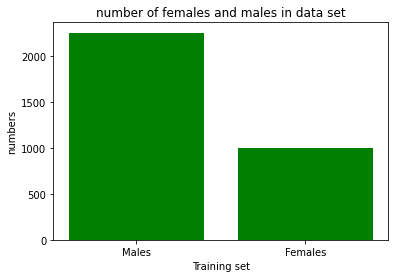

In [0]:
males= 0
females= 0
# counting the number of males and females in training data 

for i in train["Gender"]:
  if i == 0:
    males+=1
  else:
    females+=1

print (males)
print (females)


inX= ["Males", "Females"]
y_axis= [males, females]
x_axis = [i for i, _ in enumerate(inX)]

plt.bar(x_axis, y_axis, color='green')
plt.xlabel("Training set")
plt.ylabel("numbers")
plt.title("number of females and males in data set")

plt.xticks(x_axis, inX)


In [0]:
test.head()

,Image,Age,Gender
3184,"[[213, 213, 213, 213, 213, 213, 213, 213, 213,...",40,0
618,"[[28, 28, 27, 27, 26, 25, 24, 23, 22, 21, 21, ...",29,1
2837,"[[198, 198, 198, 198, 199, 199, 199, 200, 200,...",54,1
2882,"[[242, 242, 242, 241, 241, 240, 239, 238, 237,...",56,0
691,"[[209, 210, 212, 212, 210, 209, 209, 212, 216,...",60,0


370
130


([<matplotlib.axis.XTick at 0x7fb7b713ab38>,
 [Text(0, 0, 'Males'), Text(0, 0, 'Females')])

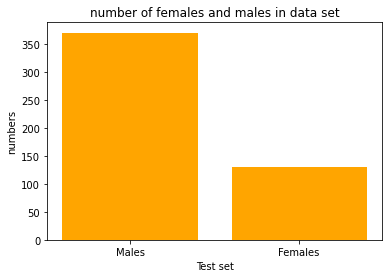

In [0]:
males= 0
females= 0
# counting the number of males and females in test data 

for i in test["Gender"]:
  if i == 0:
    males+=1
  else:
    females+=1

print (males)
print (females)


inX= ["Males", "Females"]
y_axis= [males, females]
x_axis = [i for i, _ in enumerate(inX)]

plt.bar(x_axis, y_axis, color='orange')
plt.xlabel("Test set")
plt.ylabel("numbers")
plt.title("number of females and males in data set")

plt.xticks(x_axis, inX)


### Classefier

In [0]:
x = np.array([[np.array([1,2,3]),[1,2,3]]])
print (x)
x_tf = tf.convert_to_tensor(x)
print (type(x_tf))

[[[1 2 3]
  [1 2 3]]]
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [0]:
# function to prepare batches to be trained 

def get_batch(x):
  rand_idxs = np.random.choice(train.shape[0], x, True)

  x = (train.loc[rand_idxs]["Image"]).to_numpy()
  img = np.zeros((x.shape[0],512,512))
  for idx in range((x.shape[0])):
    img[idx]=x[idx]
  img= np.expand_dims(img,-1)
  
  y = train.loc[rand_idxs]["Gender"].to_numpy()
  lab = np.zeros((y.shape[0]))
  for idx in range((y.shape[0])):
    lab[idx]=y[idx]
  lab= np.expand_dims(lab,-1)
  
  return img,lab


In [0]:
n_filters = 12  # fillters to be used in CNN

# function that contains the forward propagation of the network 

def classifier(n_outputs=1):
    Conv2D = functools.partial(tf.keras.layers.Conv2D, padding='same', activation='relu')
    BatchNormalization = tf.keras.layers.BatchNormalization
    Flatten = tf.keras.layers.Flatten
    Dense = functools.partial(tf.keras.layers.Dense, activation='relu')

    model = tf.keras.Sequential([
    Conv2D(filters=1*n_filters, kernel_size=5,  strides=2),
    BatchNormalization(),
    
    Conv2D(filters=2*n_filters, kernel_size=5,  strides=2),
    BatchNormalization(),

    Conv2D(filters=4*n_filters, kernel_size=3,  strides=2),
    BatchNormalization(),

    Conv2D(filters=6*n_filters, kernel_size=3,  strides=2),
    BatchNormalization(),

    Flatten(),
    Dense(512),
    Dense(n_outputs, activation=None),
  ])
    return model
My_classifier = classifier()

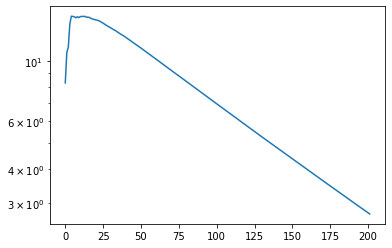

100%|██████████| 101/101 [05:19<00:00,  3.17s/it]


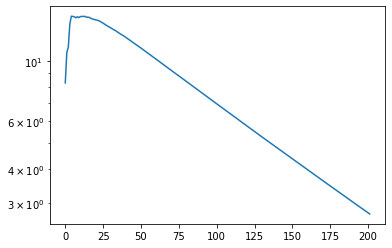

In [0]:
# Training hyperparameters
batch_size = 32
num_epochs = 2  \
learning_rate = 5e-4
tf.keras.backend.set_floatx('float64')

optimizer = tf.keras.optimizers.Adam(learning_rate) # define  optimizer
loss_history = mdl.util.LossHistory(smoothing_factor=0.99) # to record loss evolution
plotter = mdl.util.PeriodicPlotter(sec=2, scale='semilogy')
if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

@tf.function
def standard_train_step(x, y):
    
    with tf.GradientTape() as tape:
    # feed the images into the model
      logits = My_classifier(x)
      logits=tf.cast(logits, tf.float64)
    #Compute the loss
      loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)

  # Backpropagation
    grads = tape.gradient(loss, My_classifier.trainable_variables)
    optimizer.apply_gradients(zip(grads, My_classifier.trainable_variables))
    return loss
    return logits 
  

# The training loop
for epoch in range(num_epochs):
    for idx in tqdm(range(train.shape[0]//batch_size)):
        # Grab a batch of training data and propagate through the network
        x, y = get_batch(batch_size)
        loss = standard_train_step(x, y)

        # Record the loss and plot the evolution of the loss as a function of training
        loss_history.append(loss.numpy().mean())
        plotter.plot(loss_history.get())

In [0]:
# calculating accuracy 

x = (test["Image"]).to_numpy()
img = np.zeros((x.shape[0],512,512))
for idx in range((x.shape[0])):
  img[idx]=x[idx]
img= np.expand_dims(img,-1)

x = (test["Gender"]).to_numpy()
targets = np.zeros((x.shape[0]))
for idx in range((x.shape[0])):
  targets[idx]=x[idx]
targets= np.expand_dims(targets,-1)

logits = My_classifier(img)
logits=tf.cast(logits, tf.float64)
logits= np.squeeze(logits)
print (logits)

acc = 0
# res=0.5
# for i, idx in zip(logits, logits.shape[0]):
#   if i>=0.5:
#     res=1
#   else:
#     res=0
#   logits[]

logits = [i >= 0.5 for i in logits]
#print(logits)
for i in range(len(logits)):
  if int(logits[i]) == targets[i]: 
    acc=acc+1
acc2 = (acc/len(logits))*100
print("acc = ", acc2, "%")



[-1.41782022 -5.07534456 -0.29115307 -6.92326403 -3.08534837 -1.86903715
 -1.54901779 -3.49372292 -0.20547849 -1.20371139  1.98552108  4.16577005
 -0.37386686  8.04277802 -6.02147245 -9.18901157 -2.91368699  7.02406454
 -2.11607027 -1.6532923   2.84453154  0.81997603 -2.60355735 -3.51085377
 -2.36310744 -3.83957005 -1.64477038 -2.63526678  0.21553117  1.63043869
 -2.74715519 -3.9587276  -0.65478057 -6.28789902 -1.43214178 -2.72793484
 -2.82515192 -3.63994074 -0.81399328 -5.14216375 -4.44488096 -2.60933328
 -3.36634922 -0.90383172 -2.77978659 -3.51456213 -4.16534472  0.79837698
  3.91816282 -3.74340343 -7.0264225   0.53415173 -1.27293551 -5.02868128
 -2.20573139  1.59523606  3.17571831 -2.31341124 -2.30848837 -3.80679631
  5.16766119 -4.35249281 -4.31138563 -2.17365217  2.27807927 -1.50474405
 -3.63267565 -1.59049511 -3.63385344  3.89007163 -2.72793484 -3.46670961
 -1.91424477 -2.12472725 -4.59294844 -2.977355   -3.3386333   0.61086637
 -1.47756851  1.54372263 -3.50943136 -2.00222325  2

456


([<matplotlib.axis.XTick at 0x7fb7aeb7e400>,
 [Text(0, 0, 'correct'), Text(0, 0, 'not correct')])

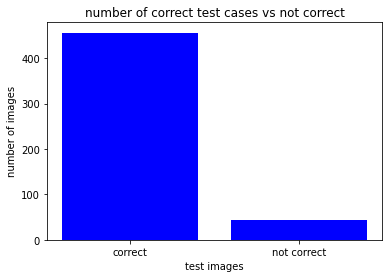

In [0]:
print (acc)

inX= ["correct", "not correct"]
y_axis= [acc, len(logits)-acc]
x_axis = [i for i, _ in enumerate(inX)]

plt.bar(x_axis, y_axis, color='blue')
plt.xlabel("test images")
plt.ylabel("number of images")
plt.title("number of correct test cases vs not correct")

plt.xticks(x_axis, inX)

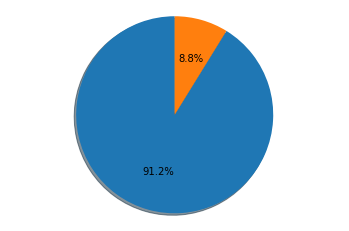

In [0]:

sizes = [acc2, 100-acc2]
fig1, ax1 = plt.subplots()
plt.title = 'Accuracy'

ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [0]:
correct_males=0
correct_females=0
for i in range(len(logits)):
  if int(logits[i]) == targets[i]:
    if logits[i]==0:
      correct_males+=1
    else:
      correct_females+=1
  else:
    if int(logits[i]) ==1:
      print (i)

    
incorrect_males=males- correct_males
incorrect_females= females -correct_females

# print (correct_females)
# print (correct_males)
# print (incorrect_females)
# print (incorrect_males)


109
281
301
331
370
459
463
469


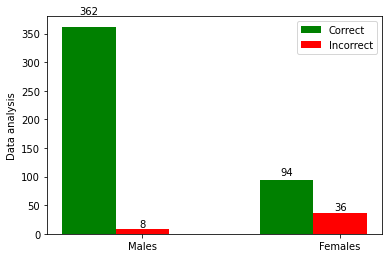

In [0]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [correct_males, correct_females]
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = [incorrect_males, incorrect_females]
rects2 = ax.bar(ind+width, zvals, width, color='r')


ax.set_ylabel('Data analysis')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Males', 'Females') )
ax.legend( ( ('Correct', 'Incorrect') ))


def autolabel(rects):
  for rect in rects:
    h = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

Male


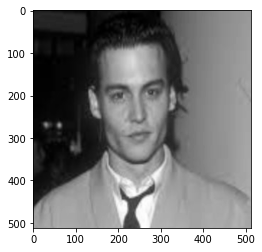

In [0]:
plt.imshow(np.squeeze(img[0]),"gray")
gen= logits[0]
if gen:
  print ("Female")
else:
  print ("Male")

Male


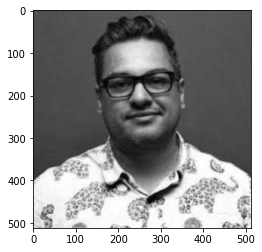

In [0]:
plt.imshow(np.squeeze(img[5]),"gray")
gen= logits[5]
if gen:
  print ("Female")
else:
  print ("Male")

Female


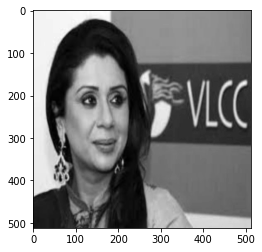

In [0]:
plt.imshow(np.squeeze(img[101]),"gray")
gen= logits[101]
if gen:
  print ("Female")
else:
  print ("Male")

Male


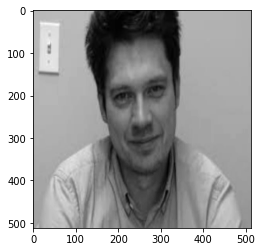

In [0]:
plt.imshow(np.squeeze(img[300]),"gray")
gen= logits[300]
if gen:
  print ("Female")
else:
  print ("Male")

Female


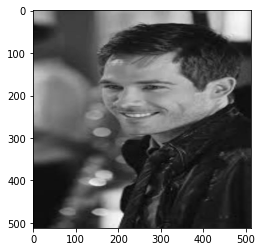

In [0]:
plt.imshow(np.squeeze(img[370]),"gray")
gen= logits[370]
if gen:
  print ("Female")
else:
  print ("Male")

Female


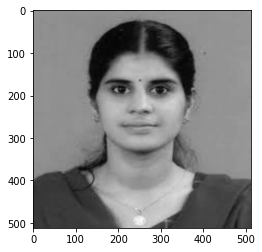

In [0]:
plt.imshow(np.squeeze(img[99]),"gray")
gen= logits[99]
if gen:
  print ("Female")
else:
  print ("Male")

Male


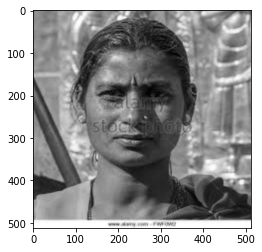

In [0]:
plt.imshow(np.squeeze(img[212]),"gray")
gen= logits[212]
if gen:
  print ("Female")
else:
  print ("Male")


### Trying diffrent method

> For Feature Extraction from Image Data: Grayscale Pixel Values as Features

> For Feature Extraction from Image Data: Extracting Edges






### Feature extraction 

In [0]:
# Images are already transformed into grayscale 
# Noise removing 

def MedianFilter(img1):
    img2 =np.zeros((512,512))
    for i in range(2,img1.shape[0]-2):
        for j in range(2,img1.shape[1]-2):
            img2[i,j]=np.median(img1[i-2:i+2+1,j-2:j+2+1])
    return img2 

# Applying on training set

for i in train ["Image"]:
  i= MedianFilter(i)


# fig, (ax1,ax2) = plt.subplots(1, 2)
# fig.set_size_inches(8, 8)
# ax1.imshow( train ["Image"][2021] ,'gray')
# ax2.imshow( test ,'gray')
# plt.show()


In [0]:
# Applying on test set

for i in test ["Image"]:
  i= MedianFilter(i)



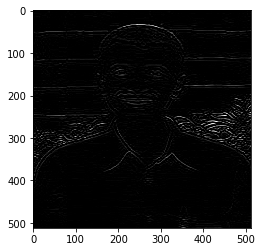

In [0]:
# applying edge detection 

laplace_kernel= np.array([[ -1,  -1, -1],
                         [ -1,  8,  -1],
                          [-1, -1, -1]])

sobel_vertical_edge_kernel = np.array([[ -1,  0,  1],
                                   [ -2,  0,  2],
                                    [-1, 0, 1]])

sobel_horizontal_edge_kernel = np.array([[ 1,  2,  1],
                                   [ 0,  0,  0],
                                   [-1, -2, -1]])


def Conv(img1,kernal): # function to apply different convlutions using different filters 
    img2 =np.zeros((img1.shape[0],img1.shape[1]))
    
    for i in range(2,img1.shape[0]-1):
        for j in range(2,img1.shape[1]-1):
            img2[i,j]=np.sum((img1[i-1:i+2,j-1:j+2])*kernal)
    return img2 


def Laplace(img1): 
    
    img2 =np.zeros((img1.shape[0],img1.shape[1]))
    
    for i in range(2,img1.shape[0]-1):
        for j in range(2,img1.shape[1]-1):
            img2[i,j]=np.sum((img1[i-1:i+2,j-1:j+2])*laplace_kernel)
    return img2 

    

# Applying in training set 
for i in train ["Image"]:
  i= Conv(i, sobel_horizontal_edge_kernel)
  i= Conv(i, sobel_vertical_edge_kernel)
  i= Laplace(i)
  




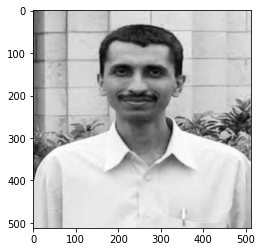

In [0]:
plt.imshow(train ["Image"][10],'gray',vmin=0,vmax=255)

In [0]:
# Applying in test set 

for i in test ["Image"]:
  i= Conv(i, sobel_horizontal_edge_kernel)
  i= Conv(i, sobel_vertical_edge_kernel)
  i= Laplace(i)



### Classefier 

In [0]:
def new_classifier(n_outputs=1):
    
    Flatten = tf.keras.layers.Flatten
    Dense = functools.partial(tf.keras.layers.Dense, activation='relu')

    model = tf.keras.Sequential([
    Flatten(),
    Dense(512),
    Dense(n_outputs, activation=None),
  ])
    return model
My_classifier2 = new_classifier()

In [0]:
# Training hyperparameters
batch_size = 32
num_epochs = 2  # keep small to run faster
learning_rate = 5e-4
tf.keras.backend.set_floatx('float64')

optimizer = tf.keras.optimizers.Adam(learning_rate) # define our optimizer
loss_history = mdl.util.LossHistory(smoothing_factor=0.99) # to record loss evolution
plotter = mdl.util.PeriodicPlotter(sec=2, scale='semilogy')
if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

@tf.function
def standard_train_step(x, y):
    
    with tf.GradientTape() as tape:
    # feed the images into the model
      logits = My_classifier2(x)
      logits=tf.cast(logits, tf.float64)
    #Compute the loss
      loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)

  # Backpropagation
    grads = tape.gradient(loss, My_classifier2.trainable_variables)
    optimizer.apply_gradients(zip(grads, My_classifier2.trainable_variables))
    return loss
    return logits 
  

# The training loop!
for epoch in range(num_epochs):
    for idx in tqdm(range(train.shape[0]//batch_size)):
        # Grab a batch of training data and propagate through the network
        x, y = get_batch(batch_size)
        loss = standard_train_step(x, y)

        # Record the loss and plot the evolution of the loss as a function of training
        loss_history.append(loss.numpy().mean())
        plotter.plot(loss_history.get())

In [0]:
x = (test["Gender"]).to_numpy()
targets = np.zeros((x.shape[0]))
for idx in range((x.shape[0])):
  targets[idx]=x[idx]
targets= np.expand_dims(targets,-1)

logits = My_classifier(img)
logits=tf.cast(logits, tf.float64)
logits= np.squeeze(logits)
print (logits)

acc = 0


logits = [i >= 0.5 for i in logits]
#print(logits)
for i in range(len(logits)):
  if int(logits[i]) == targets[i]: 
    acc=acc+1
acc2 = (acc/len(logits))*100
print("acc = ", acc2, "%")
